## Comparision Plots - GF, CSS, and DNM For A1 and LBelt
(some code blocks have been removed for presentation purpose)

In [ ]:

%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from vis import basic_plot
import numpy as np
from vis import zoom_to_multiple_rois, basic_plot


###  Plottings are for regions A1 and LBelt.

In [1]:
css = np.load('saved_model_params/css_A1_LBelt.npz')
gm = np.load('./saved_model_params/gf_A1_LBelt.npz')
dn = np.load('./saved_model_params/dnm_A1_LBelt.npz')

In [2]:
mask = pd.read_csv('./auditory_A1_LBelt.csv')
mask = np.array(mask['mask']).astype(bool)

## 1. Surface plot for Surround size - center size (for A1 and LBelt)

### For Grid Search

In [44]:
np.max(dn["gridsearch_params"][:, 5]), np.mean(dn["gridsearch_params"][mask][:, 5] - dn["gridsearch_params"][mask][:, 1])

(3.562863826751709, 1.879115919091537)

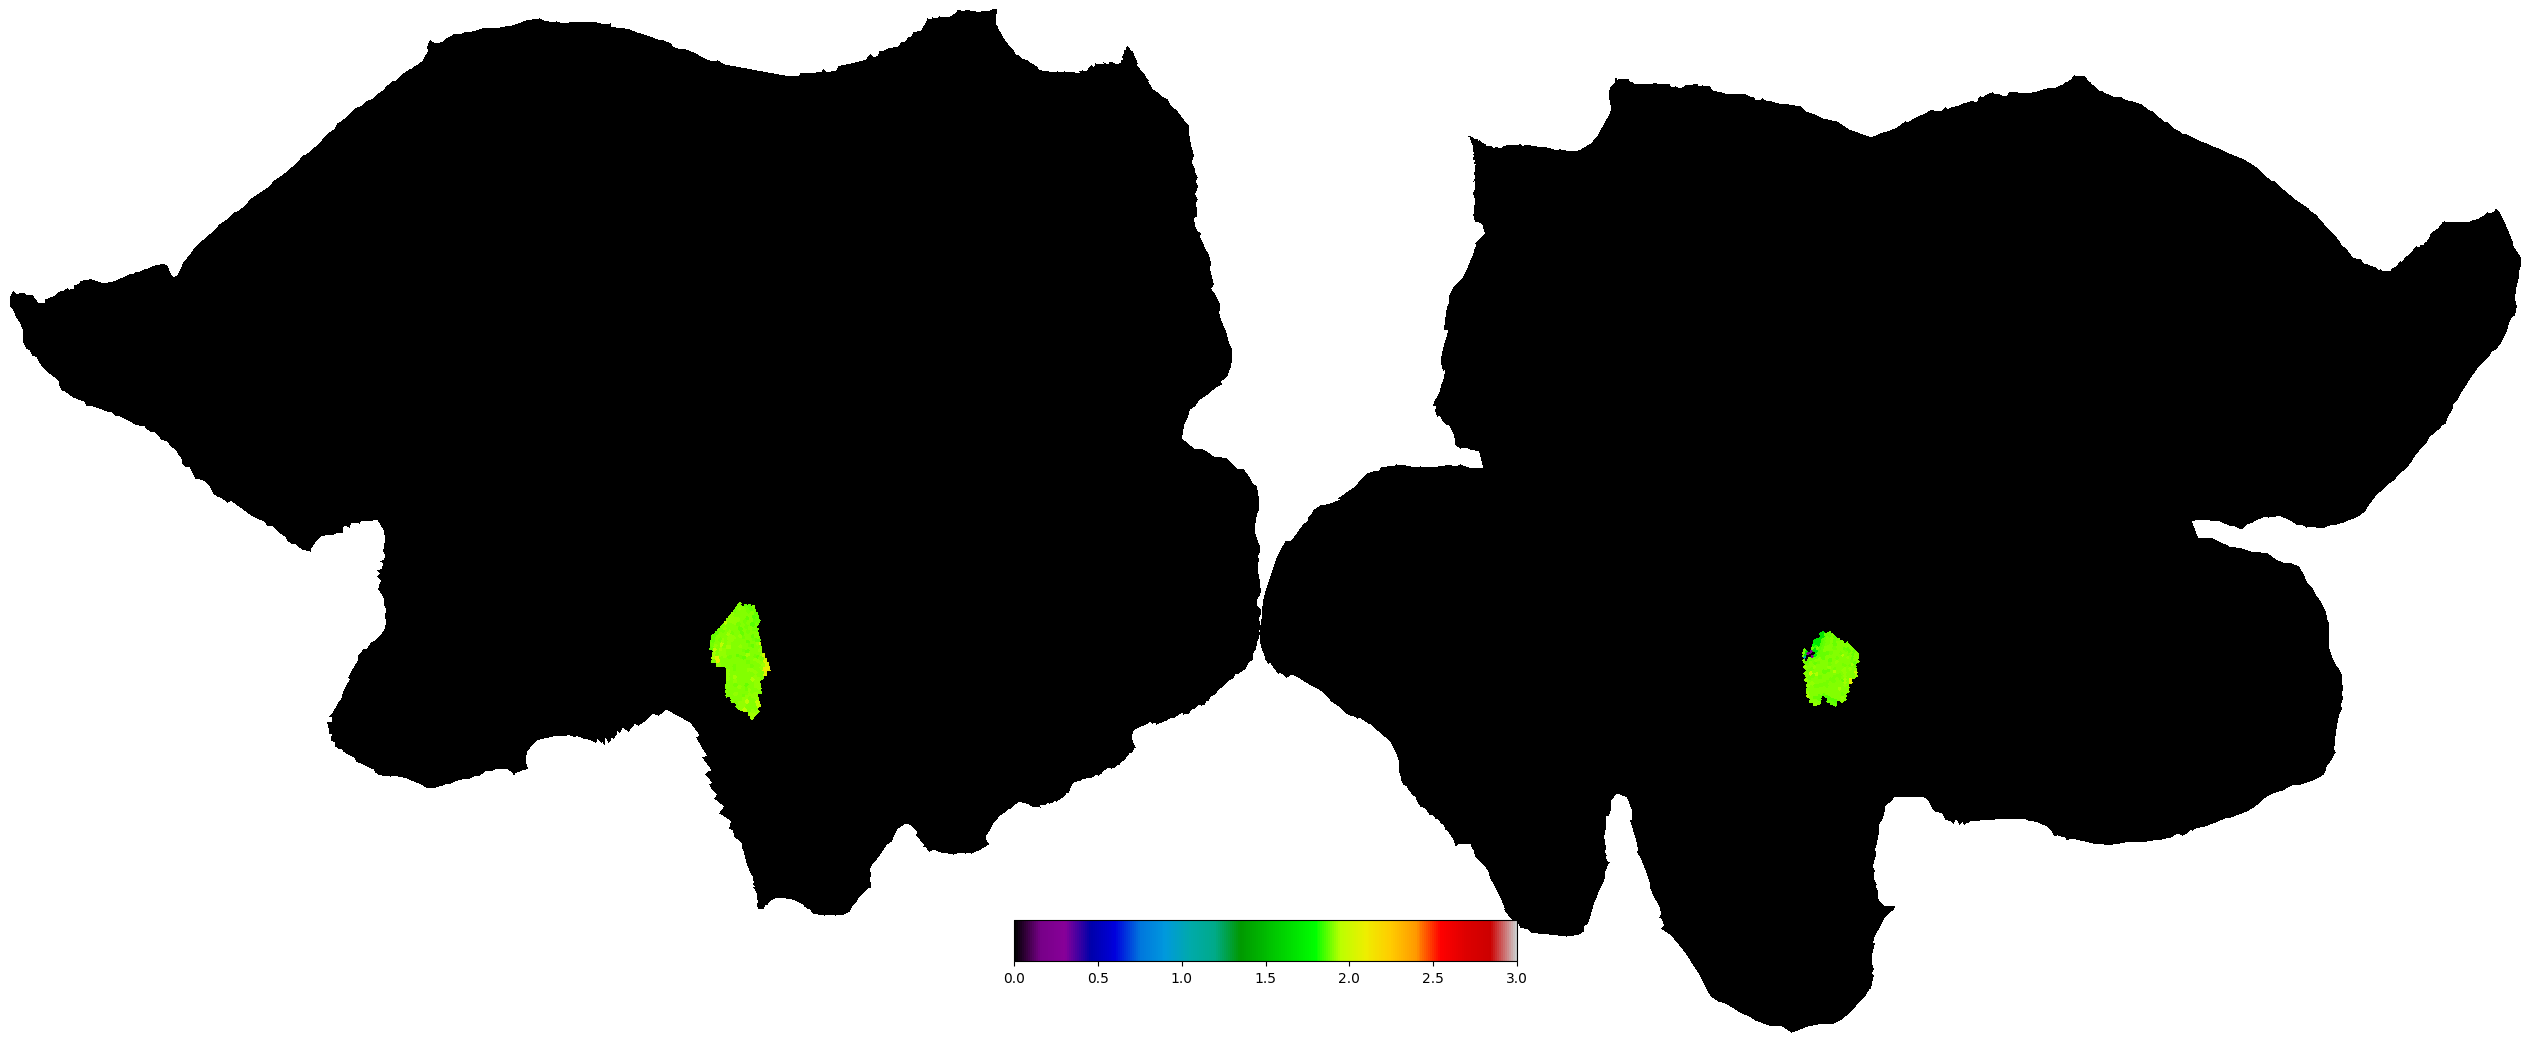

In [46]:
bp=basic_plot(dn["gridsearch_params"][:, 5] - dn["gridsearch_params"][:, 1], colorbar = True, vmax=3,cmap='nipy_spectral')

As shown in the plotting, also according to the mean of diffrences, for most vertices the diffrence(ss - cs) seems somewhere between 1.5 and 2.0.

### Iterative search

In [ ]:
np.mean(dn["iterative_search_params"][mask][:, 5] - dn["iterative_search_params"][mask][:, 1])

0.021118616535379314

 The mean of the difference between the CS and SS is a very small number. Therefore, to visualize this I am setting the vertices out of the ROI for one of the params a higher number.

In [ ]:
dn_copy = np.copy(dn["iterative_search_params"])
dn_copy[:, 5][~mask] = 5

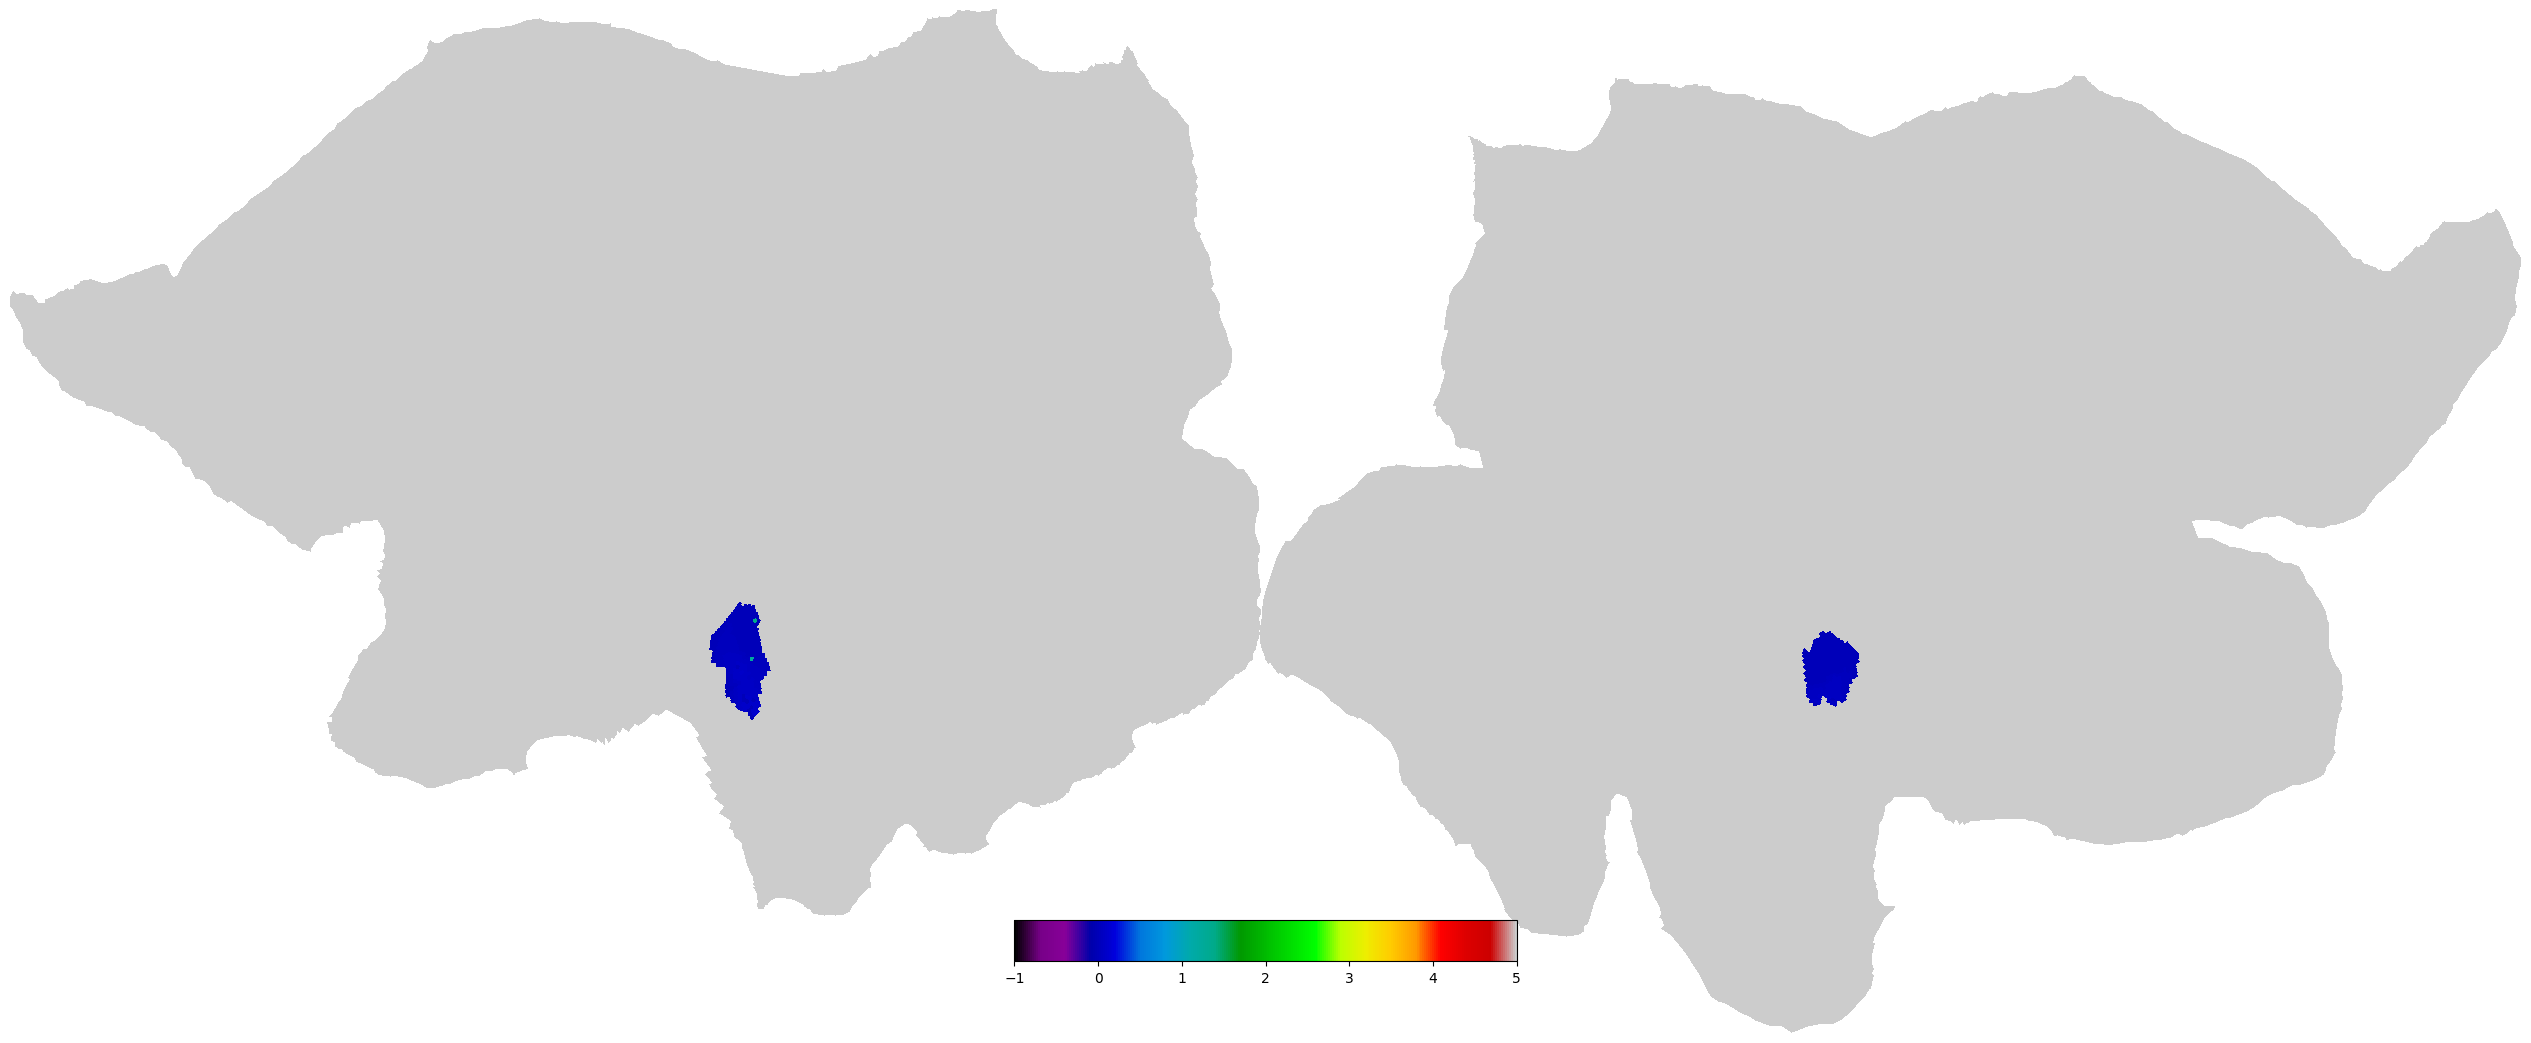

In [ ]:
bp=basic_plot(dn_copy[:, 5] - dn_copy[:, 1], colorbar = True, vmin =-1, vmax=5,cmap='nipy_spectral')

### A zoom plot for the left hemisphere. 

[-210.70038, -168.02205, -77.59999, -17.929646]
[-206.27255, -160.37436, -80.13305, -9.50556]


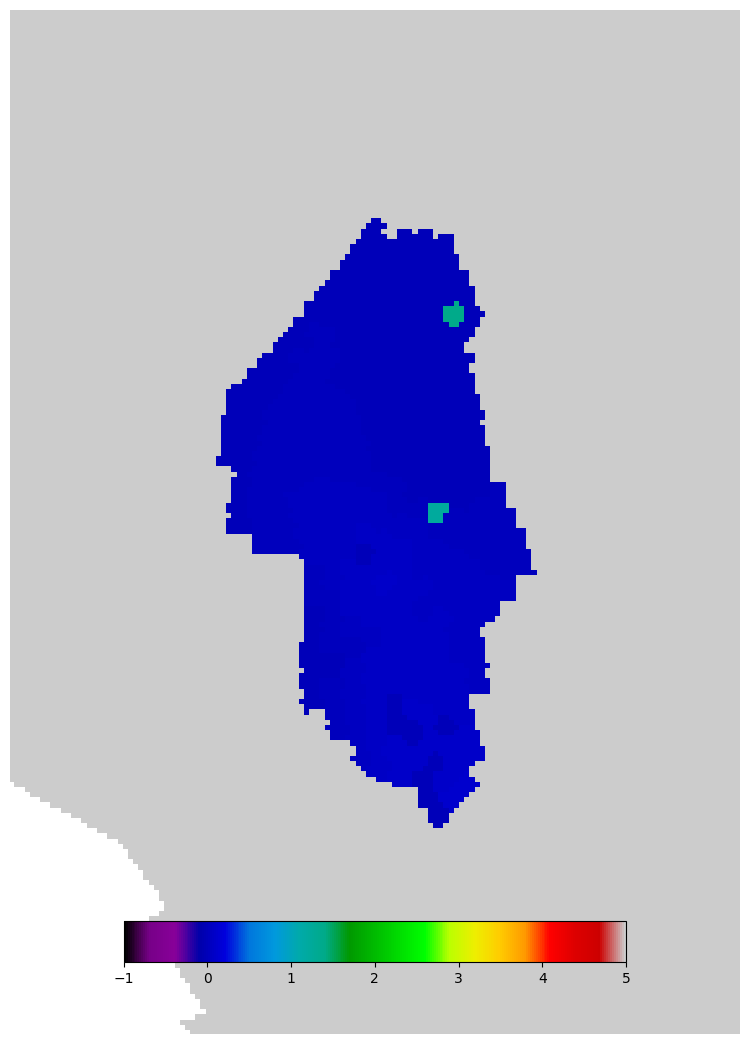

In [ ]:

bp=basic_plot(dn_copy[:, 5] - dn_copy[:, 1], colorbar = True, vmin =-1, vmax=5,cmap='nipy_spectral')
hem = 'left'
zoom_to_multiple_rois('hcp_999999', ['A1', 'LBelt'], hem, margin=15.0)
plt.show()

### Let's check correlation for these two variables.
But first, let's see the distribution to decide on a correlation test.

In [ ]:
from scipy.stats import shapiro
alpha = 0.05

stat, p_value_gs_cs = shapiro(dn["gridsearch_params"][mask][:, 1])
stat, p_value_gs_ss = shapiro(dn["gridsearch_params"][mask][:, 5])
p_value_gs_cs>alpha, p_value_gs_ss>alpha

(False, False)

In [ ]:
stat, p_value_cs = shapiro(dn["iterative_search_params"][mask][:, 1])
stat, p_value_ss = shapiro(dn["iterative_search_params"][mask][:, 5])
p_value_cs > alpha, p_value_ss > alpha

(False, False)

##### They all look normaly distributed(both for the iterative and grid fit), so we can do pearson's correlation test in this case.

##### Grid Fit (left) and Iterative fit(right)

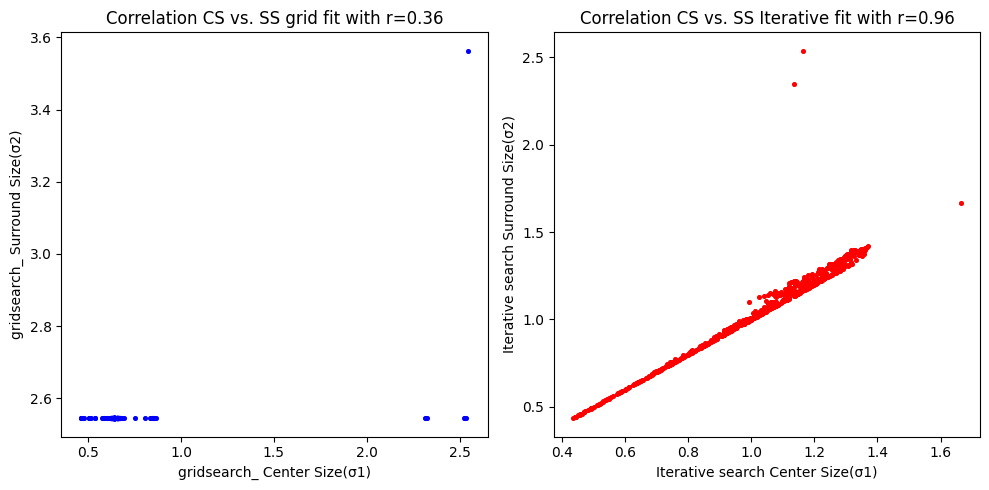

In [ ]:
from scipy.stats import pearsonr

corr_grid, p_value_grid = pearsonr(dn["gridsearch_params"][mask][:, 1], dn["gridsearch_params"][mask][:, 5])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  

plt.scatter(dn["gridsearch_params"][mask][:, 1], dn["gridsearch_params"][mask][:, 5],  s=7, c='blue')
plt.title(f'Correlation CS vs. SS grid fit with r={corr_grid:.2f}')

plt.xlabel('gridsearch_ Center Size(σ1)')
plt.ylabel('gridsearch_ Surround Size(σ2)')


plt.subplot(1, 2, 2)  
corr_iter, p_value_iter = pearsonr(dn["iterative_search_params"][mask][:, 1], dn["iterative_search_params"][mask][:, 5])

plt.scatter(dn["iterative_search_params"][mask][:, 1], dn["iterative_search_params"][mask][:, 5],  s=7, c='red')
plt.title(f'Correlation CS vs. SS Iterative fit with r={corr_iter:.2f}')
plt.xlabel('Iterative search Center Size(σ1)')
plt.ylabel('Iterative search Surround Size(σ2)')
plt.tight_layout()
plt.show()

##### As we can see here there is a huge difference in correlation of the center size and surround size between the grid search and the iterative search parameters.

## 2.  Within set R^2 between CSS and Norm model 

(Note: this R2s are not cross validated, I was saving time by running only one fold, but I will be running all 4 folds now.)

#### Train Set

Difference of R2 for the iterative search for Divisive normalisation vs CSS model.

In [ ]:
train_r2_diff = np.copy(dn["iterative_search_params"][:, -1] - css["iterative_search_params"][:, -1])
train_r2_diff[~mask] = -1

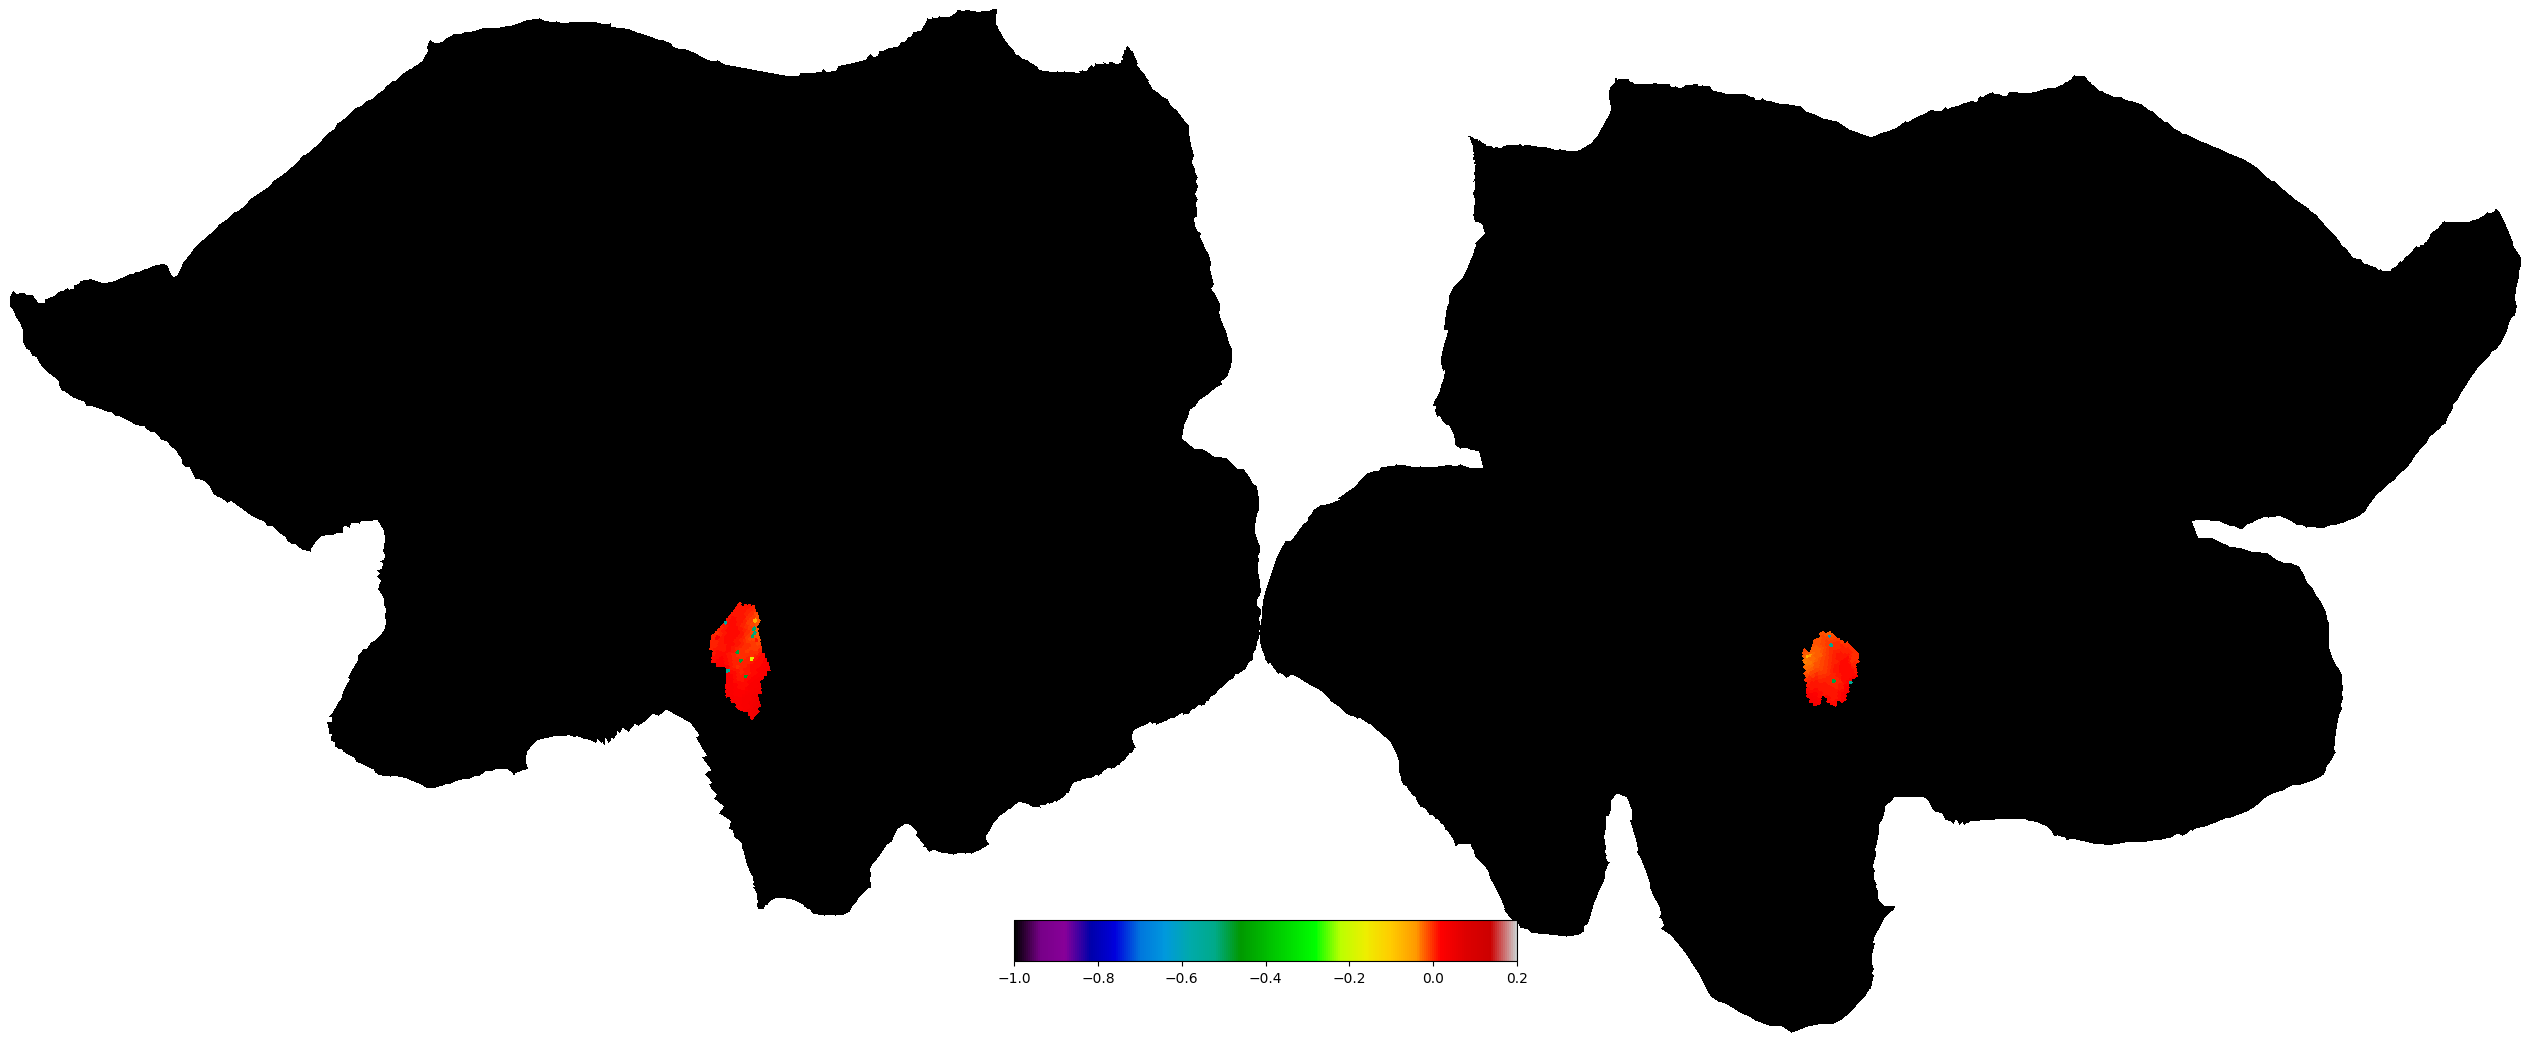

In [ ]:
bp=basic_plot(train_r2_diff, colorbar = True, vmin=-1.0, vmax=.2,cmap='nipy_spectral')

In [ ]:
np.min(train_r2_diff[mask]), np.max(train_r2_diff[mask]), np.mean((train_r2_diff[mask]))

(-0.609868748048631, 0.049199079889240216, -0.0030653819971717083)

In [ ]:
np.sum(train_r2_diff[mask] > 0), np.sum(train_r2_diff[mask] < 0), np.sum(train_r2_diff[mask] == 0)

(456, 170, 0)

The R2 difference for the train set lies in a range of [-0.6099, 0.0492], and out of 626 vertices in this ROI, DN seem to have a higher R2 for majority of them, the group mean and distribution of R2 for both sets(train and test) of the models is shown below after the surface plots.

### A zoom plot for the left hemisphere. 

[-210.70038, -168.02205, -77.59999, -17.929646]
[-206.27255, -160.37436, -80.13305, -9.50556]


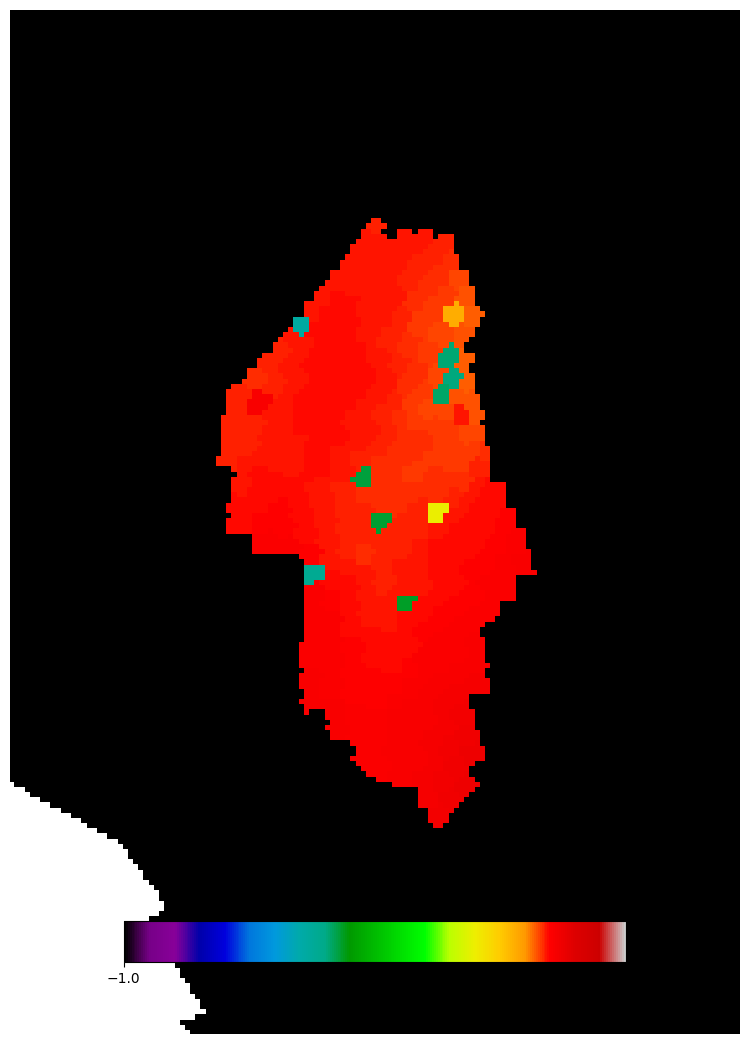

In [ ]:
bp=basic_plot(train_r2_diff, colorbar = True, vmin=-1.0, vmax=.2,cmap='nipy_spectral')
hem = 'left'
zoom_to_multiple_rois('hcp_999999', ['A1', 'LBelt'], hem, margin=15.0)
plt.show()

#### Test Set

Difference in R2 for test set DN vs CSS.

In [ ]:
test_r2_diff = np.copy(dn['CV_rsq'] - css['CV_rsq'])
test_r2_diff[~mask] = -1

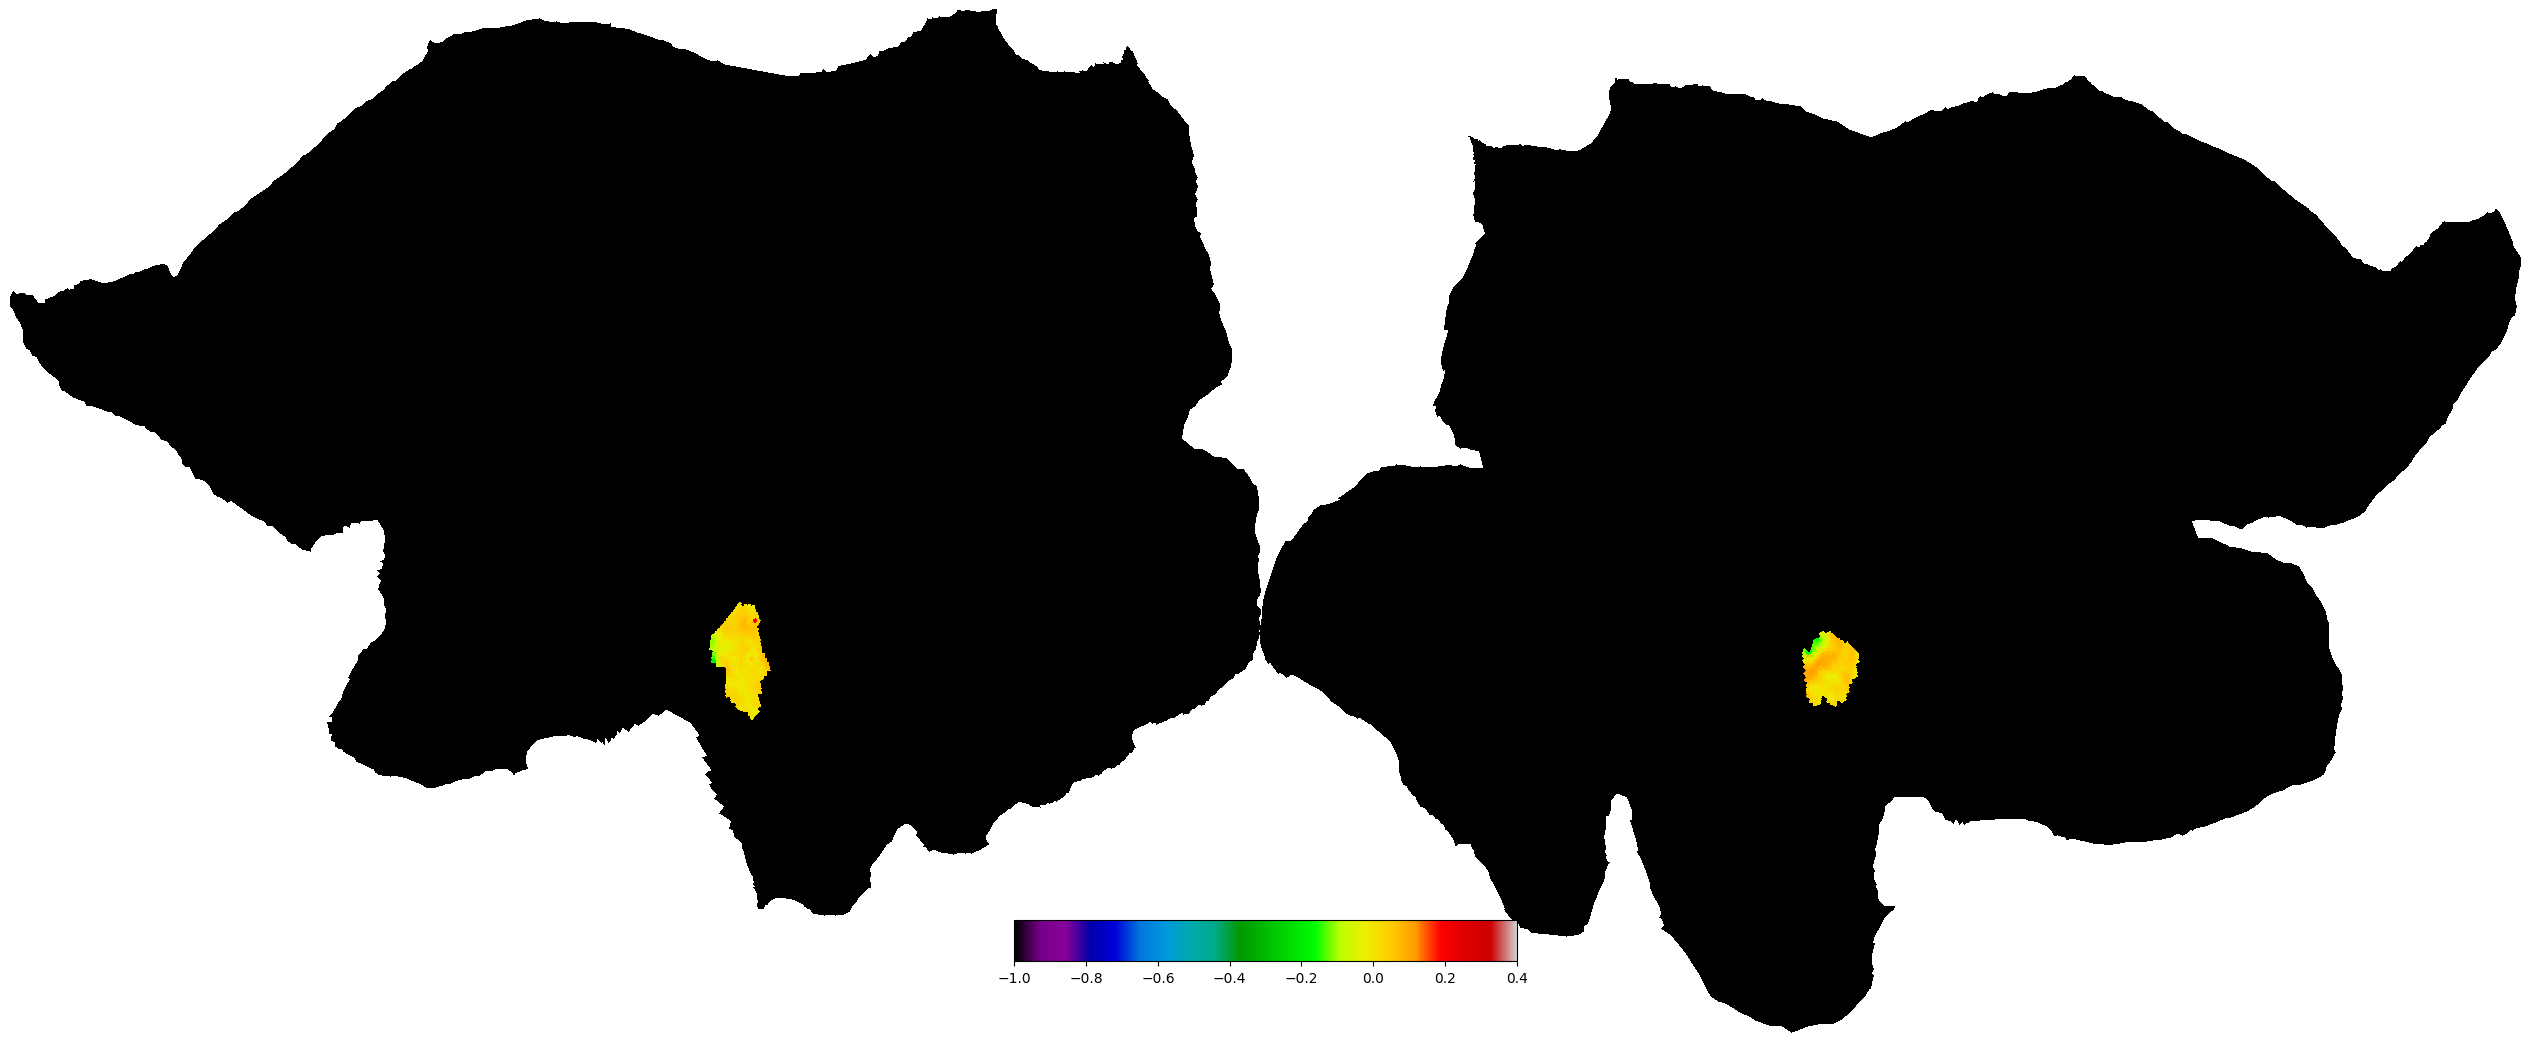

In [ ]:
bp=basic_plot(test_r2_diff, colorbar = True, vmin=-1.0, vmax=.4,cmap='nipy_spectral')

### A zoom plot for the left hemisphere. 

[-210.70038, -168.02205, -77.59999, -17.929646]
[-206.27255, -160.37436, -80.13305, -9.50556]


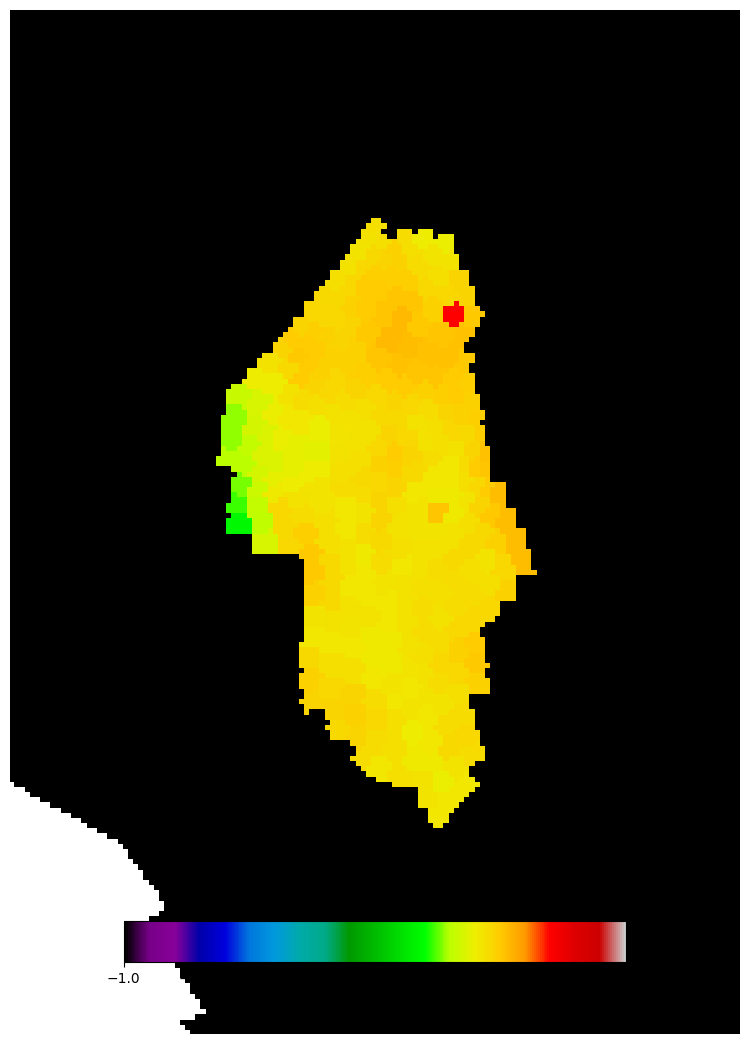

In [ ]:
bp=basic_plot(test_r2_diff, colorbar = True, vmin=-1.0, vmax=.4,cmap='nipy_spectral')
hem = 'left'
zoom_to_multiple_rois('hcp_999999', ['A1', 'LBelt'], hem, margin=15.0)
plt.show()

### Let's take a look at the distribution of R^2 for both model's train and test sets.

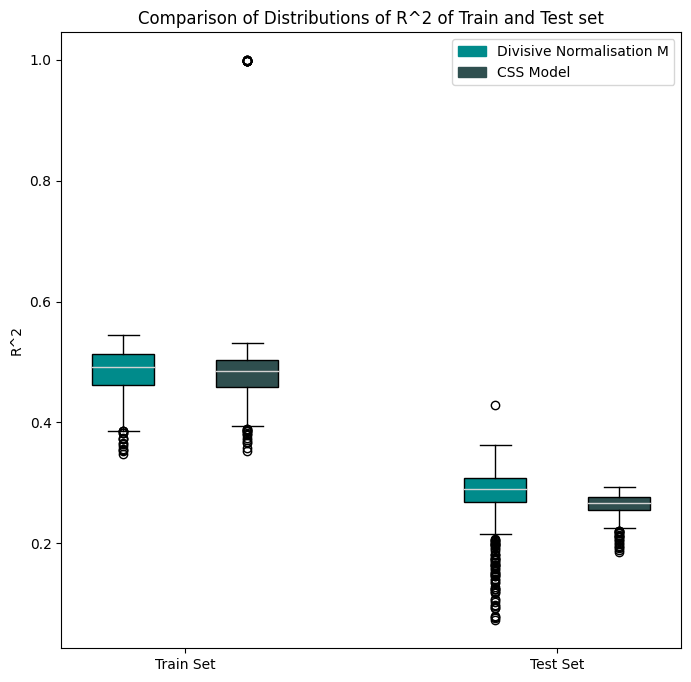

In [65]:
import matplotlib.patches as mpatches

data = [dn["iterative_search_params"][:, -1][mask], css["iterative_search_params"][:, -1][mask], dn['CV_rsq'][mask], css['CV_rsq'][mask]]
colors = ['darkcyan', 'darkslategray', 'darkcyan', 'darkslategray']

fig, ax = plt.subplots(figsize=(8, 8))
bp = ax.boxplot(data, positions=[1, 2, 4, 5], patch_artist=True)

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
for flier in bp['fliers']:
    flier.set(marker='o', color='black', alpha=1)
# Custom x-axis labels
ax.set_xticks([1.5, 4.5])
ax.set_xticklabels(['Train Set', 'Test Set'])

ax.set_ylabel('R^2')
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

for median in bp['medians']:
    median.set(color='lightgrey', linewidth=1)
plt.title('Comparison of Distributions of R^2 of Train and Test set')

# Add a legend
blue_patch = mpatches.Patch(color='darkcyan', label='Divisive Normalisation M')
orange_patch = mpatches.Patch(color='darkslategray', label='CSS Model')
plt.legend(handles=[blue_patch, orange_patch])
plt.show()


##### From this comparision, it can be seen that Divisive normalisation is doing slightly better than the css model when looking at the mean/median of R^2 for both groups, but when looking at the distribution of the R2 values, it seems to be skewed towards lower R^2 values, and there is variablity in performance of the DN model(high variance in R^2). May be I should do this separately for the regions and see if that changes anything...



## 3. Plot of a good-fitting voxel's target data Vs. prediction -- Divisive normalisation model.

Load the subject and the models.... Scroll a bit for the plots :)

In [18]:
nm=Norm_Iso1DGaussianModel(train_stim,normalise_RFs=False,filter_predictions=True,filter_type='sg',filter_params=my_analysis.fparams)

#### Identify a good fitting vertice using R2 for both grid fit and iterative fit.


In [19]:
#Indexes of best fitting vertices
max_r2_grid_fit = np.argmax(dn['gridsearch_params'][:, -1])
max_r2_iterative_fit = np.argmax(dn['iterative_search_params'][:, -1])
max_r2_test_data = np.argmax(dn['CV_rsq'])
max_r2_grid_fit, max_r2_iterative_fit


(77186, 57747)

### Using grid fit on train data

In [20]:
nm.stimulus = train_stim
target_time_series = my_analysis.sub.data_train[fold].T[max_r2_grid_fit]
predicted_time_series = predict_time_series(nm, max_r2_grid_fit, dn['gridsearch_params'])

In [21]:
param_values = f" * R2: {round(dn['gridsearch_params'][max_r2_grid_fit][-1], 3)} \n * Center size: {round(dn['gridsearch_params'][max_r2_grid_fit][1], 4)} \n* Surround size: {round(dn['gridsearch_params'][max_r2_grid_fit][5], 4)}"

##### A zoomed in time-series plot can be found below(next to this one) for a the 0-700 Time segment.

In [ ]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value= param_values, fit_type="grid_fit_params", limit_time=False)

#### Zoomed plot

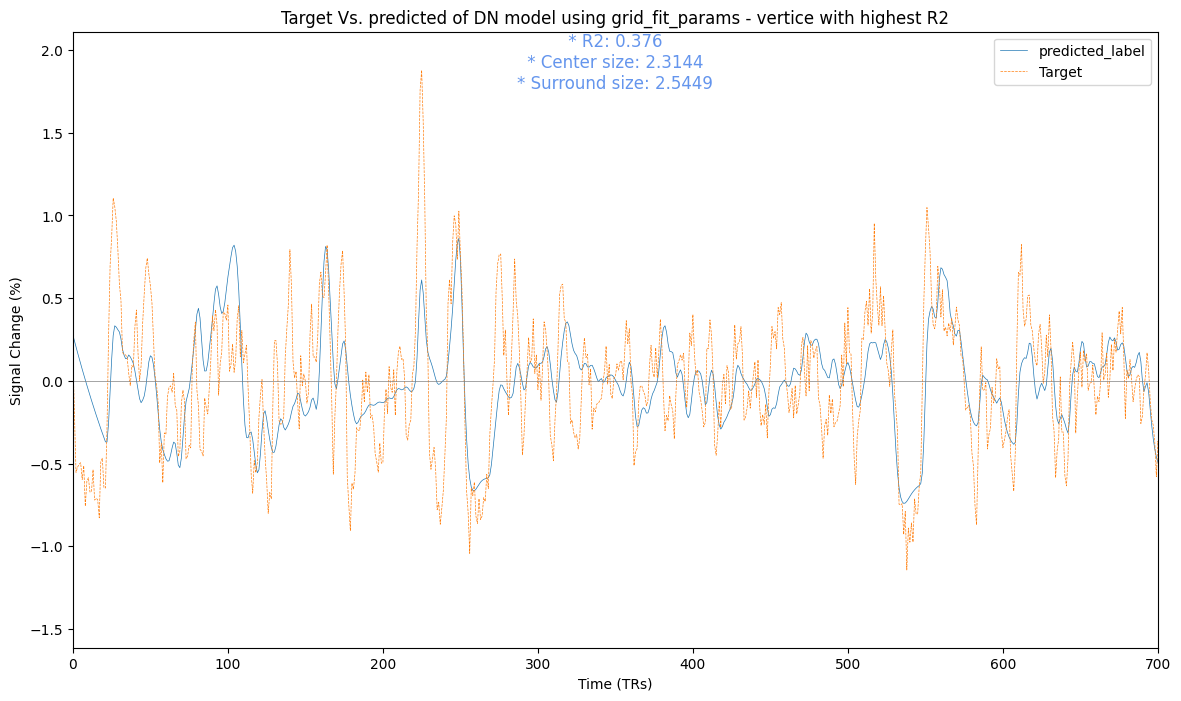

In [23]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value= param_values, fit_type="grid_fit_params", limit_time=700)

### Using the iterative fit on train data

In [24]:

target_time_series = my_analysis.sub.data_train[fold].T[max_r2_iterative_fit]
predicted_time_series = predict_time_series(nm, max_r2_iterative_fit, dn['iterative_search_params'])

In [25]:
param_values_iter = f" * R2: {round(dn['iterative_search_params'][max_r2_iterative_fit][-1], 3)} \n* Center size: {round(dn['iterative_search_params'][max_r2_iterative_fit][1], 4)} \n * Surround size: {round(dn['iterative_search_params'][max_r2_iterative_fit][5], 4)}"

##### A zoomed in time-series plot can be found below(next to this one) for a the 0-700 Time segment.

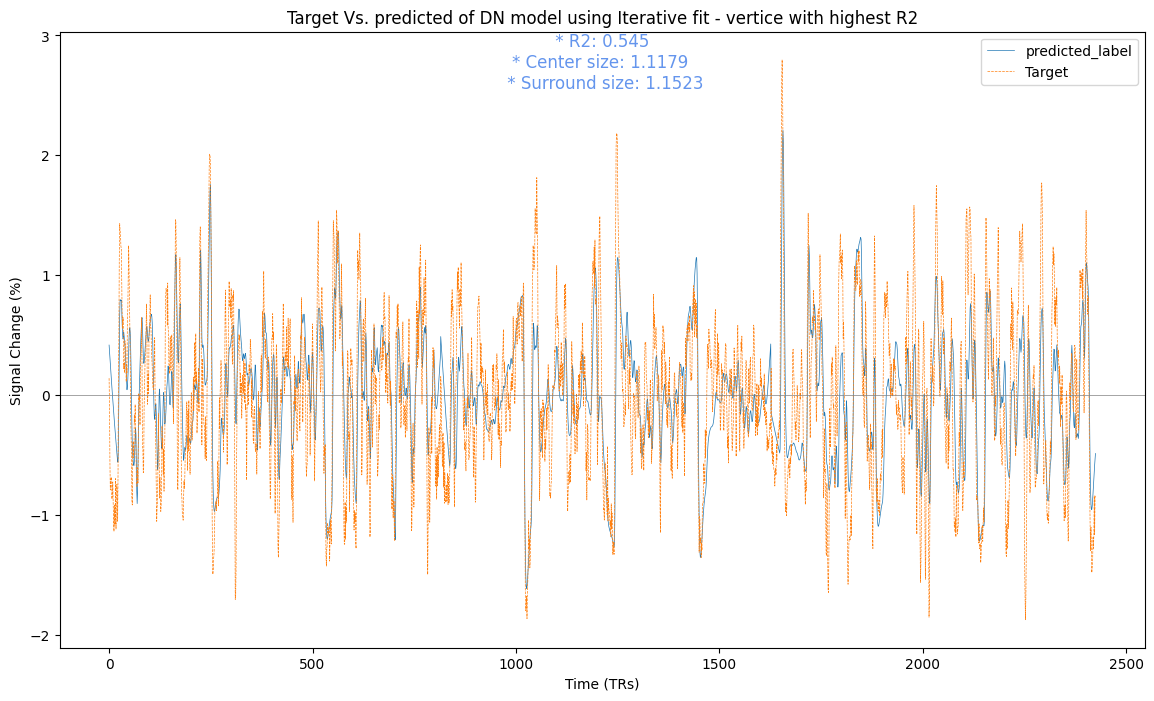

In [26]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value=param_values_iter, fit_type="Iterative fit")

#### Zoomed Plot

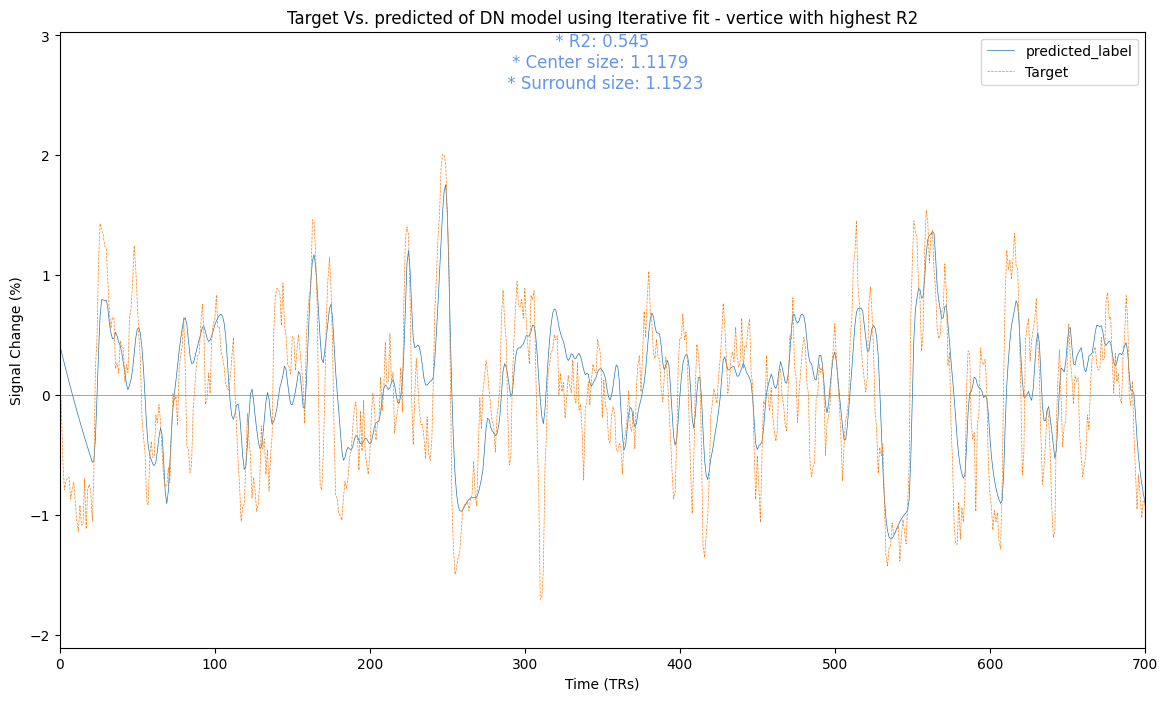

In [27]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value=param_values_iter, fit_type="Iterative fit", limit_time = 700)

### Now using the Test Data - For the best fitting voxel in the test data and using the iterative search param


In [28]:
nm=Norm_Iso1DGaussianModel(test_stim,normalise_RFs=False,filter_predictions=True,filter_type='sg',filter_params=my_analysis.fparams)


nm.stimulus = test_stim
target_time_series = my_analysis.sub.data_test[fold].T[max_r2_test_data]
predicted_time_series = predict_time_series(nm, max_r2_test_data, dn['iterative_search_params'])

In [29]:
param_values_iter = f" * R2: {round(dn['iterative_search_params'][max_r2_test_data][-1], 3)} \n* Center size: {round(dn['iterative_search_params'][max_r2_test_data][1], 4)} \n * Surround size: {round(dn['iterative_search_params'][max_r2_test_data][5], 4)}"

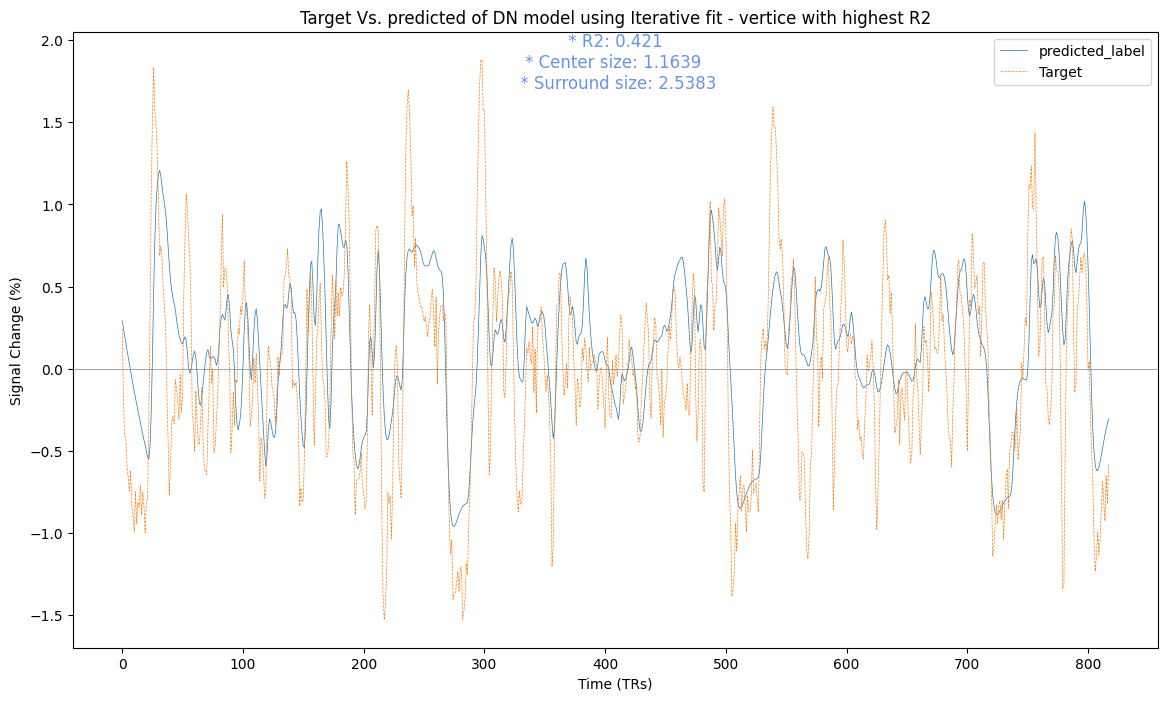

In [30]:
plot_time_series(predicted_time_series, target_time_series, max_r2_test_data, param_value=param_values_iter, fit_type="Iterative fit")

## 4.  A plot of the biggest improvement of the norm model relative to the CSS and gauss model.


#### Find voxel with the biggest r2 difference of DN with css and gaussian models.

for grid fit: DN - gaussian

for iterative fit - DN - gaussian and DN - CSS


In [31]:
max_r2_grid_gf_dn = np.argmax(dn['gridsearch_params'][mask][:, -1] - gm['gridsearch_params'][mask][:, -1])
max_r2_iterative_fit_dn_gf = np.argmax(dn['iterative_search_params'][mask][:, -1]-gm['iterative_search_params'][mask][:, -1])
max_r2_iterative_fit_dn_css = np.argmax(dn['iterative_search_params'][mask][:, -1]-css['iterative_search_params'][mask][:, -1])
max_r2_grid_gf_dn, max_r2_iterative_fit_dn_gf, max_r2_iterative_fit_dn_css

(369, 285, 269)

### Now for each of these vertices show model prediction of all three models.

### For Improvement of R2 based on grid search params( DN - Gaussian )
(css is omitted here because it doesn't have grid search params)


In [ ]:
target_time_series = my_analysis.sub.data_train[fold].T[mask][max_r2_grid_gf_dn]
gf_predictions = predict_time_series(gauss_model, max_r2_grid_gf_dn, gm['gridsearch_params'][mask])
dn_predictions = predict_time_series(nm, max_r2_grid_gf_dn, dn['gridsearch_params'][mask])
gf_predictions, dn_predictions, max_r2_grid_gf_dn

In [36]:
R2 = [dn['gridsearch_params'][mask][max_r2_grid_gf_dn][-1], 0, gm['gridsearch_params'][mask][max_r2_grid_gf_dn][-1]]

#### Now plotting .... Take a look at the second timeseries for a clear and zoomed in for a time range.

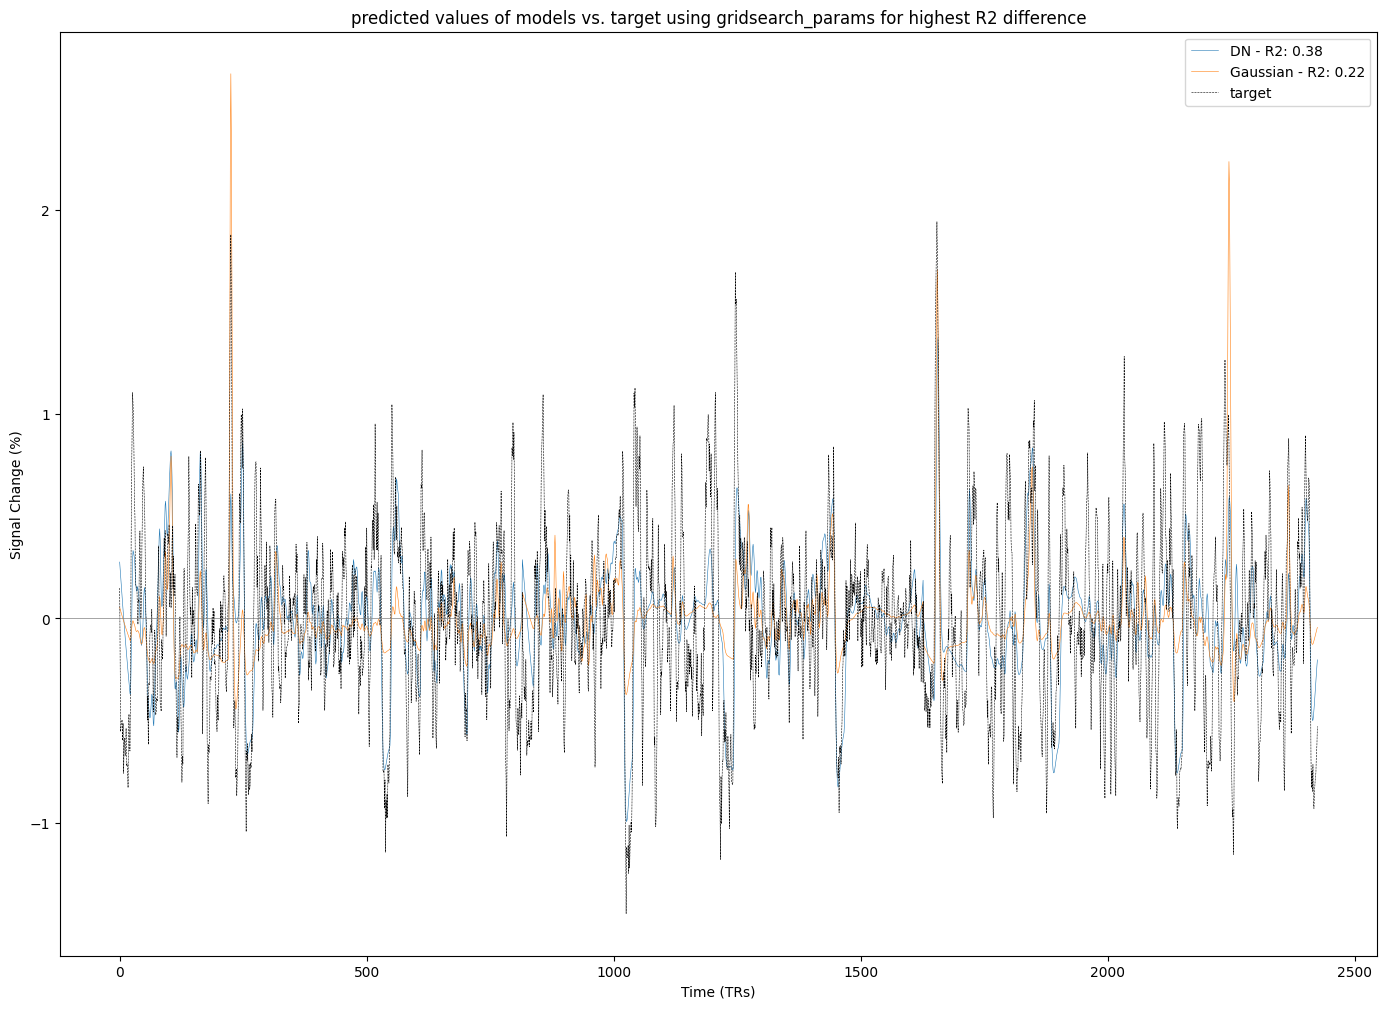

In [37]:
plot_time_series_multiple(target =target_time_series, predicted_dn=dn_predictions, predicted_gm=gf_predictions, fit_type="gridsearch_params",R2=R2 )

#### Zoomed Plot

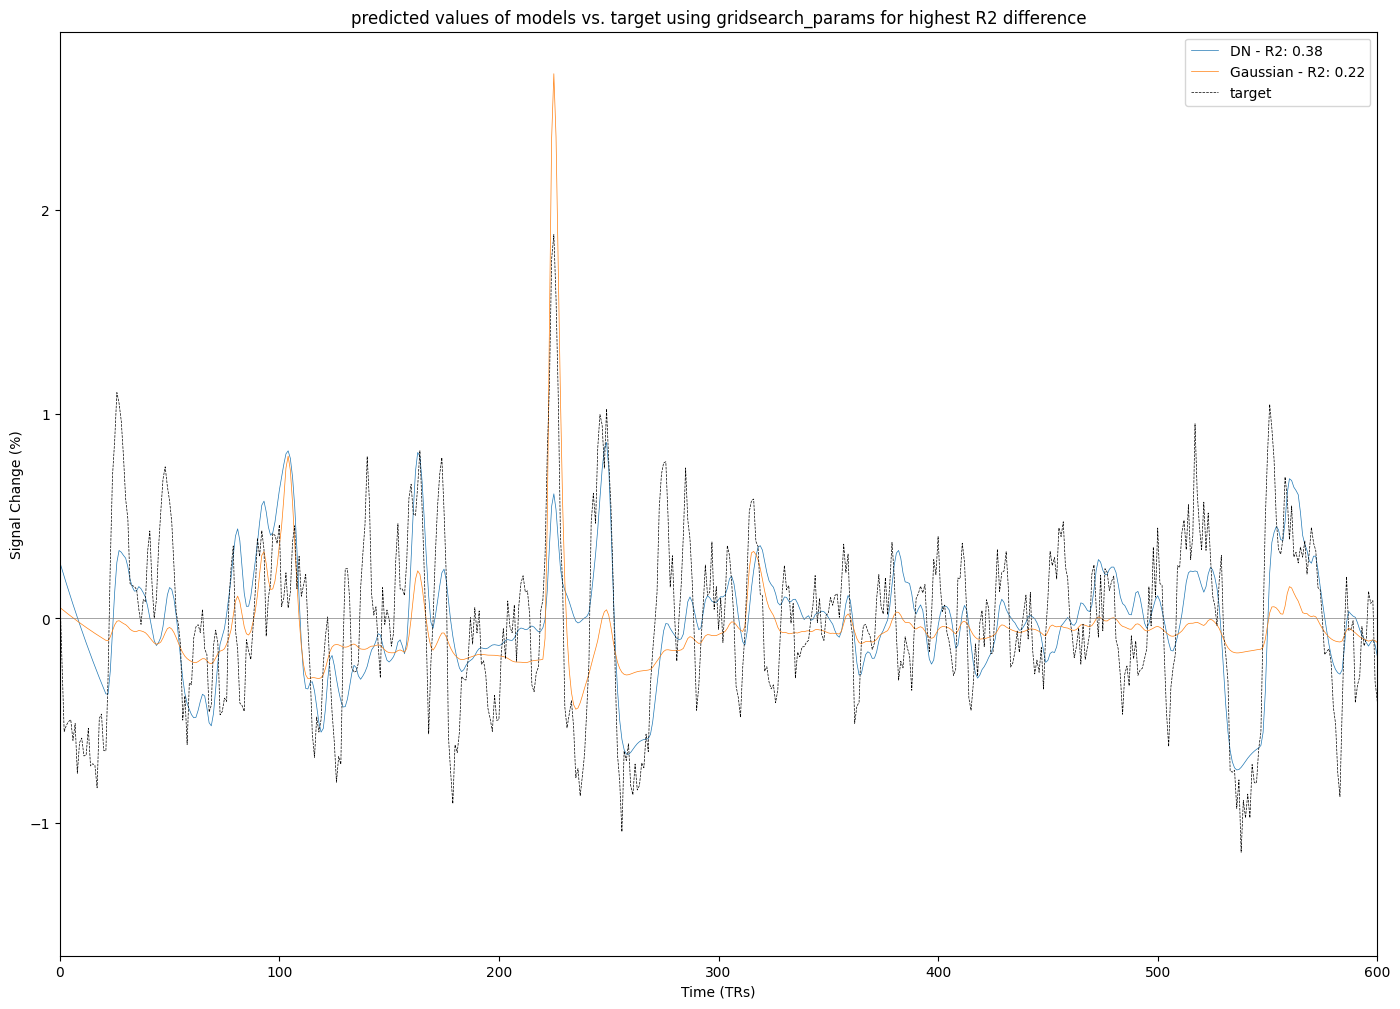

In [41]:
plot_time_series_multiple(target =target_time_series, predicted_dn=dn_predictions, predicted_gm=gf_predictions, fit_type="gridsearch_params",R2=R2, limit_time=600 )

### For Improvement of R2 based on Iterative search params( DN - Gaussian and DN - CSS )


#### For the vertice with a maximum R2 of Divisive normalisation - Gaussian

In [ ]:
target_time_series_dn_gf = my_analysis.sub.data_train[fold].T[mask][max_r2_iterative_fit_dn_gf]
gf_predictions_iter = predict_time_series(gauss_model, max_r2_iterative_fit_dn_gf, gm['iterative_search_params'][mask])
css_predictions_iter = predict_time_series(css_model, max_r2_iterative_fit_dn_gf, css['iterative_search_params'][mask])
dn_predictions_iter = predict_time_series(nm, max_r2_iterative_fit_dn_gf, dn['iterative_search_params'][mask])
gf_predictions_iter,css_predictions_iter, dn_predictions_iter, max_r2_iterative_fit_dn_gf


In [43]:
R2_iter_dn_gf = [dn['iterative_search_params'][mask][max_r2_iterative_fit_dn_gf][-1], css['iterative_search_params'][mask][max_r2_iterative_fit_dn_gf][-1], gm['iterative_search_params'][mask][max_r2_iterative_fit_dn_gf][-1]]

#### Now plotting model predictions and target for the voxel with highest R2 for DN - Gauss ... Take a look at the second timeseries for a clear and zoomed view of a time range.

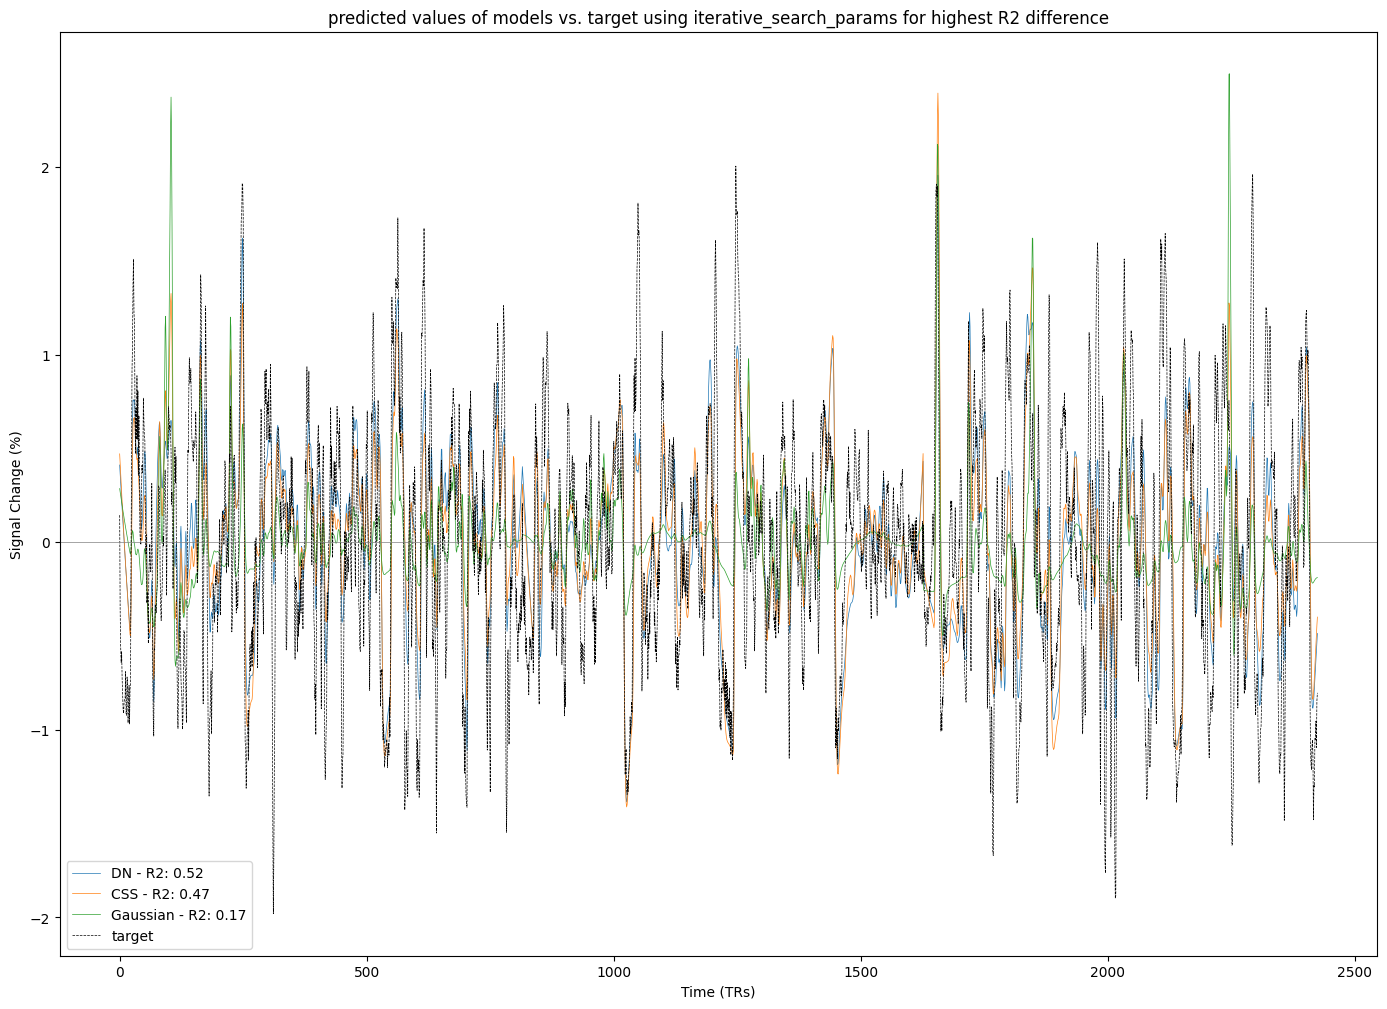

In [44]:
plot_time_series_multiple(target =target_time_series_dn_gf, predicted_css=css_predictions_iter, predicted_dn=dn_predictions_iter, predicted_gm=gf_predictions_iter, fit_type="iterative_search_params",R2=R2_iter_dn_gf )

#### Zoomed Plot

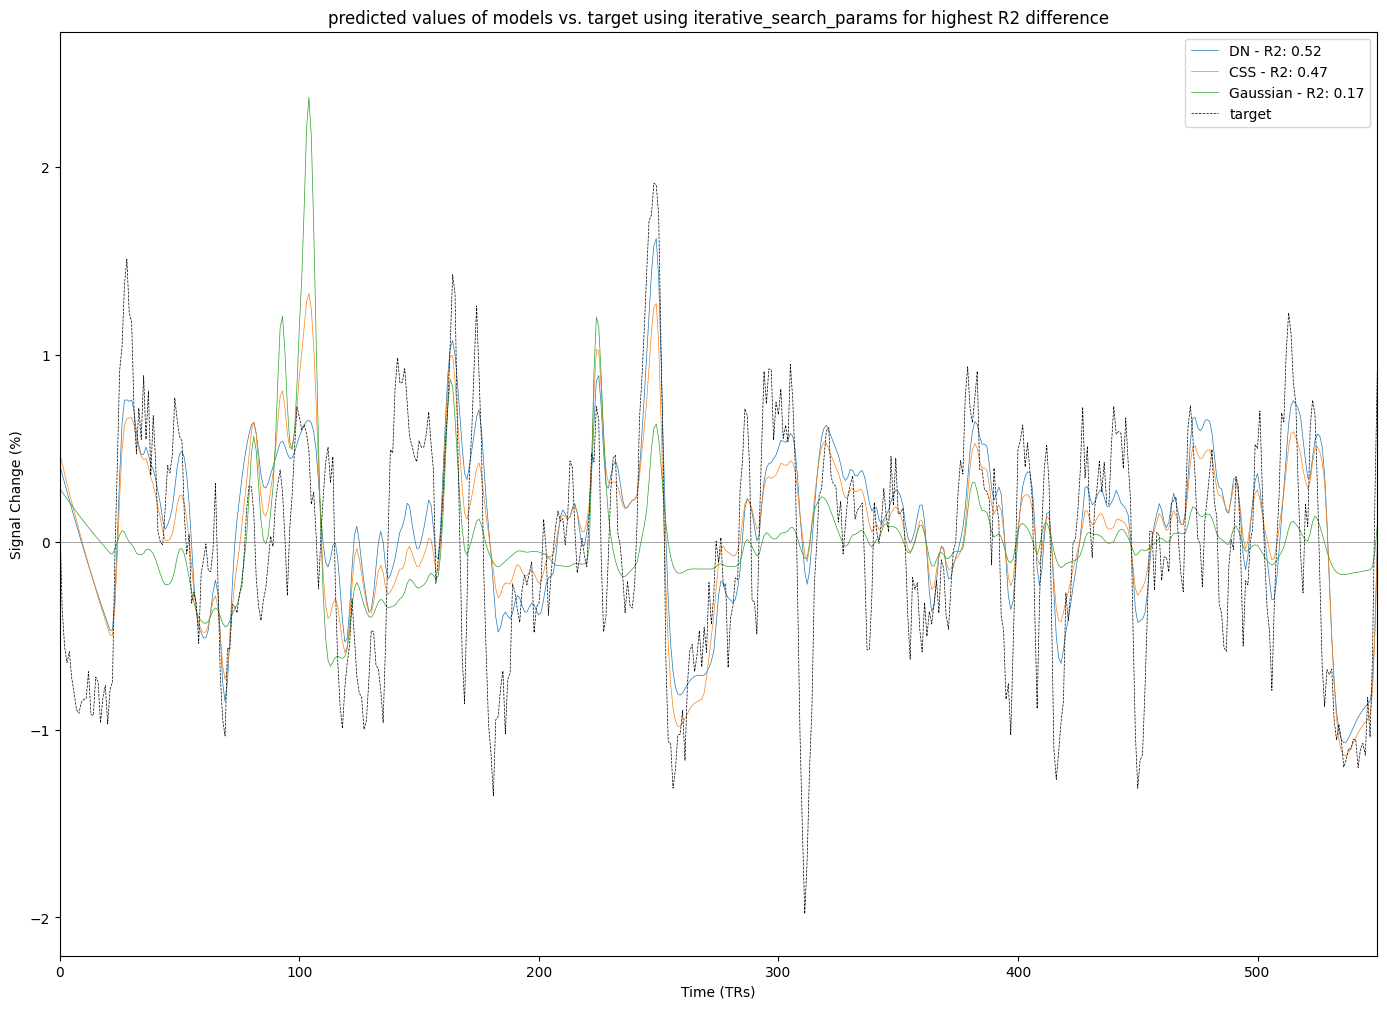

In [47]:
plot_time_series_multiple(target =target_time_series_dn_gf, predicted_dn=dn_predictions_iter, predicted_css=css_predictions_iter, predicted_gm=gf_predictions_iter, fit_type="iterative_search_params",R2=R2_iter_dn_gf, limit_time=550 )

#### Now let's do the same for the vertice with a maximum value of difference in R2 of the Divisive normalisation and the CSS model.

In [ ]:
css_model.stimulus = train_stim
target_time_series_dn_css = my_analysis.sub.data_train[fold].T[mask][max_r2_iterative_fit_dn_css]
gf_predictions_iter_ = predict_time_series(gauss_model, max_r2_iterative_fit_dn_css, gm['iterative_search_params'][mask])
css_predictions_iter_ = predict_time_series(css_model, max_r2_iterative_fit_dn_css, css['iterative_search_params'][mask])
dn_predictions_iter_ = predict_time_series(nm, max_r2_iterative_fit_dn_css, dn['iterative_search_params'][mask])
gf_predictions_iter_,css_predictions_iter_, dn_predictions_iter_, max_r2_iterative_fit_dn_css


In [49]:
R2_iter_dn_css = [dn['iterative_search_params'][mask][max_r2_iterative_fit_dn_css][-1], css['iterative_search_params'][mask][max_r2_iterative_fit_dn_css][-1], gm['iterative_search_params'][mask][max_r2_iterative_fit_dn_css][-1]]

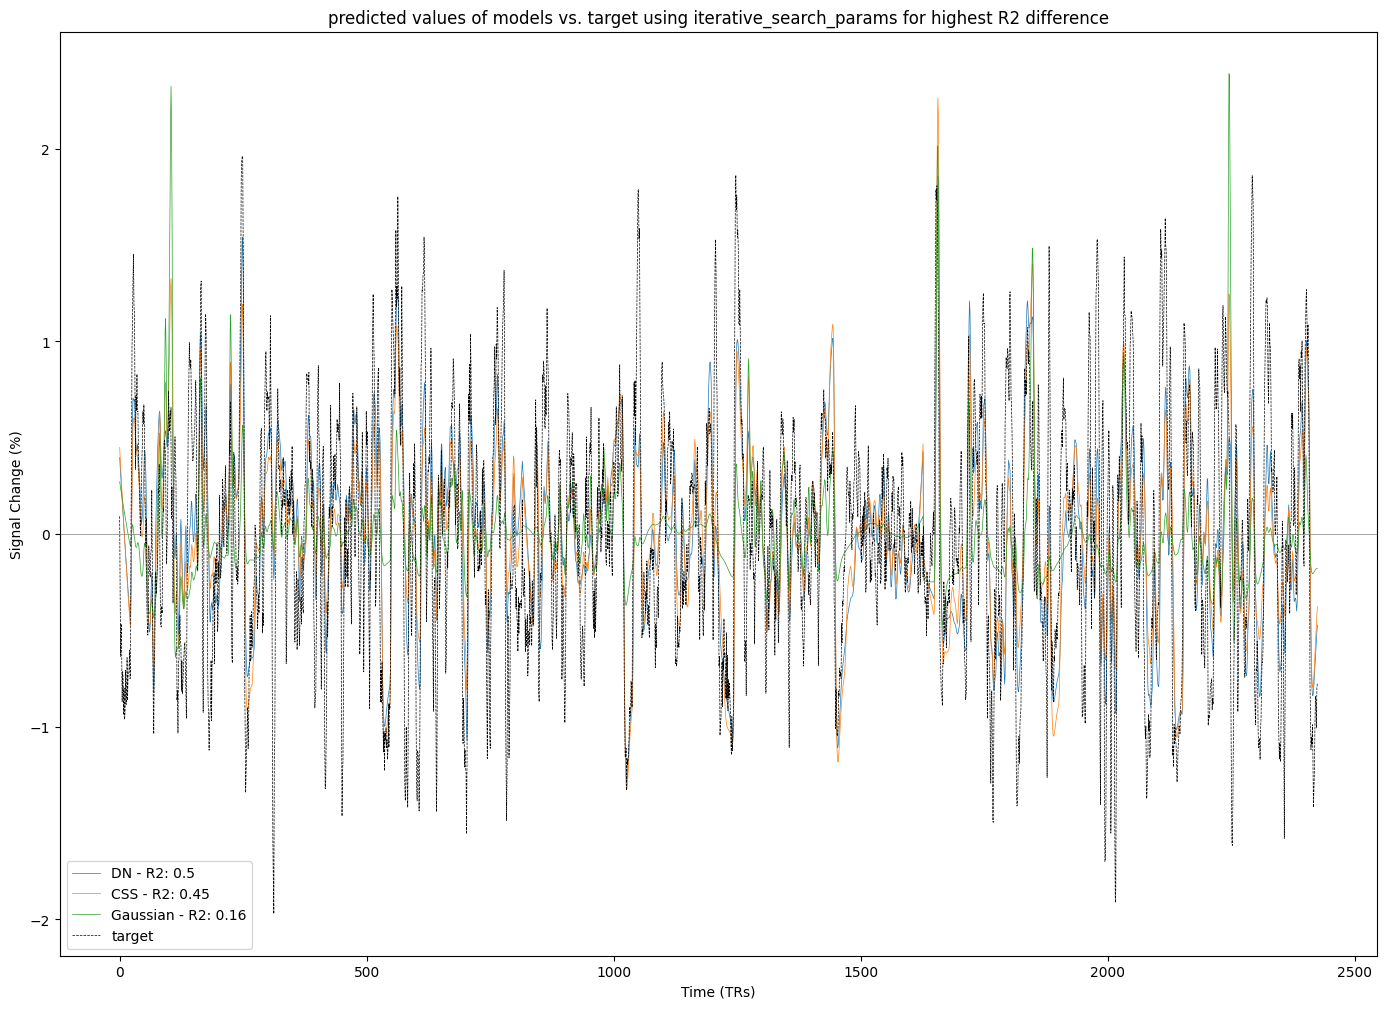

In [50]:
plot_time_series_multiple(target =target_time_series_dn_css, predicted_css=css_predictions_iter_, predicted_dn=dn_predictions_iter_, predicted_gm=gf_predictions_iter_, fit_type="iterative_search_params",R2=R2_iter_dn_css)

#### Zoomed Plot

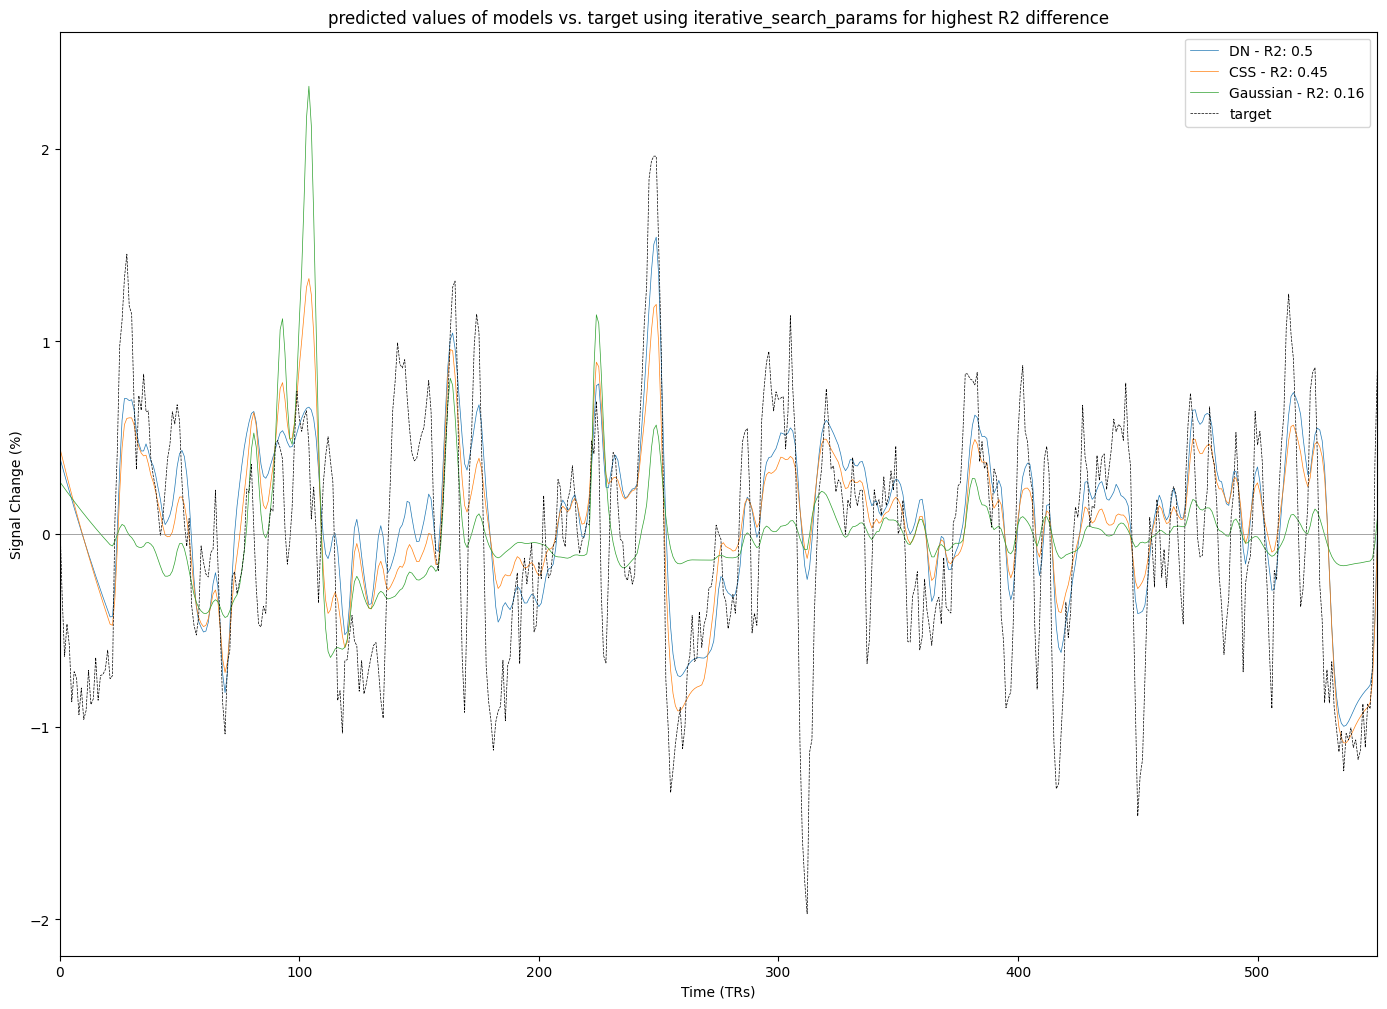

In [51]:
plot_time_series_multiple(target =target_time_series_dn_css, predicted_css=css_predictions_iter_, predicted_dn=dn_predictions_iter_, predicted_gm=gf_predictions_iter_, fit_type="iterative_search_params",R2=R2_iter_dn_css, limit_time=550)

## Biggest improvement for the test data -- using the highest r2 difference from the test data and timeseries using iterative search params

##### Get the maximum difference in R^2 == DN - CSS

In [52]:
def argmax_diff_with_zero_check(x, y):
    next_count = 0

    while True:
        diff = x - y
        max_diff_index = np.argmax(diff)

        if y[max_diff_index] == 0:
            x[max_diff_index] = 0
            next_count += 1
        else:
            break

    return max_diff_index, next_count

In [53]:

max_r2_test_dn_css, next_count = argmax_diff_with_zero_check(dn['CV_rsq'][mask], css['CV_rsq'][mask])
max_r2_test_dn_css, next_count

(25, 12)

In [54]:
nm=Norm_Iso1DGaussianModel(test_stim,normalise_RFs=False,filter_predictions=True,filter_type='sg',filter_params=my_analysis.fparams)


In [55]:
css_model=CSS_Iso1DGaussianModel(test_stim,filter_predictions=my_analysis.filter_predictions,filter_type=my_analysis.filter_type,filter_params=my_analysis.fparams)
gauss_model =Iso1DGaussianModel(test_stim,filter_predictions=my_analysis.filter_predictions,filter_type=my_analysis.filter_type,filter_params=my_analysis.fparams)

In [ ]:
target_time_series_test = my_analysis.sub.data_test[fold].T[mask][max_r2_test_dn_css]
gf_predictions_test = predict_time_series(gauss_model, max_r2_test_dn_css, gm['iterative_search_params'][mask])
css_predictions_test = predict_time_series(css_model, max_r2_test_dn_css, css['iterative_search_params'][mask])
dn_predictions_test = predict_time_series(nm, max_r2_test_dn_css, dn['iterative_search_params'][mask])
gf_predictions_test,css_predictions_test, dn_predictions_test, max_r2_test_dn_css


In [57]:
R2_iter_dn_gf = [dn['CV_rsq'][mask][max_r2_test_dn_css], css['CV_rsq'][mask][max_r2_test_dn_css], gm['CV_rsq'][mask][max_r2_test_dn_css]]

#### Now plotting model predictions and target for the voxel with highest R2 for DN - CSS according to the test data...

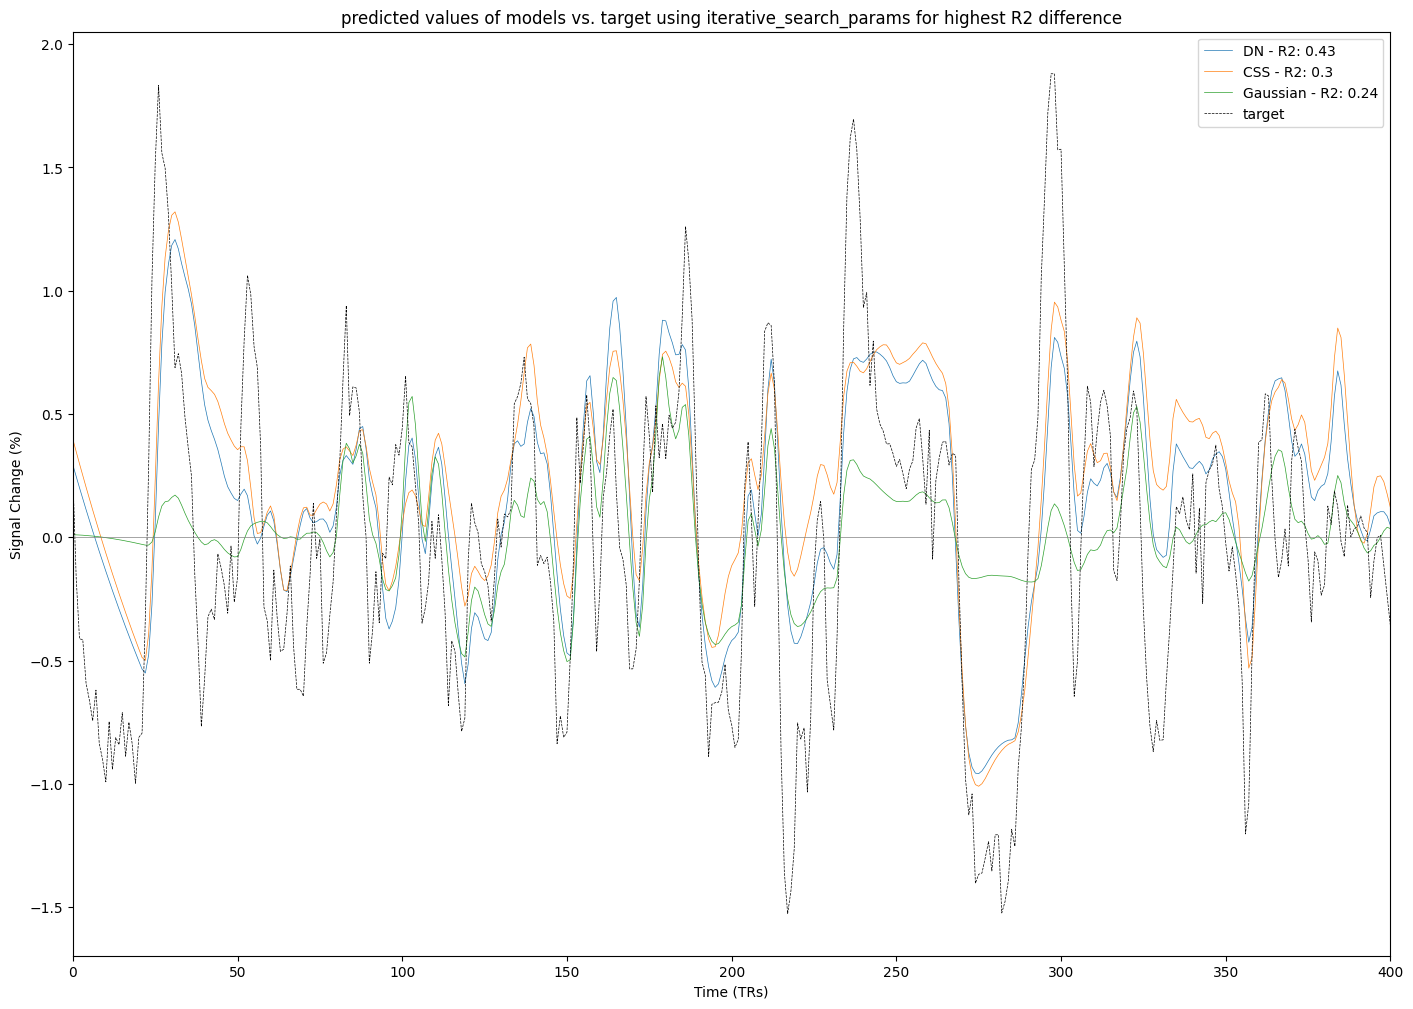

In [60]:
plot_time_series_multiple(target =target_time_series_test, predicted_css=css_predictions_test, predicted_dn=dn_predictions_test, predicted_gm=gf_predictions_test, fit_type="iterative_search_params",R2=R2_iter_dn_gf, limit_time=400)